In [38]:
import os
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt

class Stitcher():
    def __init__(self, input_dir, output_dir, feature_detector="SIFT", matcher_type="BF", plot=False):
        self.input_dir = input_dir
        self.output_dir = output_dir
        self.matcher_type = matcher_type
        self.plot = plot  # Plotting flag
        self.input_images = []
        
        # Feature Detector
        if feature_detector == "SIFT":
            self.feature_detector = cv2.SIFT_create()
        elif feature_detector == "ORB":
            self.feature_detector = cv2.ORB_create()
        else:
            raise ValueError("Invalid feature detector. Use 'SIFT' or 'ORB'.")
        
        self.feature_points_and_descriptors = []
        
        # Initialize matcher
        if self.matcher_type == "BF":
            norm_type = cv2.NORM_L2 if feature_detector == "SIFT" else cv2.NORM_HAMMING
            self.matcher = cv2.BFMatcher(norm_type, crossCheck=False)
        elif self.matcher_type == "FLANN":
            index_params = dict(algorithm=1, trees=5)
            search_params = dict(checks=50)
            self.matcher = cv2.FlannBasedMatcher(index_params, search_params)
        else:
            raise ValueError("Invalid matcher type. Use 'BF' or 'FLANN'.")

    def read_input_dir(self):
        image_extensions = {".jpeg", ".jpg", ".png"}
        
        # Filter and sort files by numeric prefix
        files = [f for f in os.listdir(self.input_dir) if os.path.splitext(f)[1].lower() in image_extensions]
        files.sort(key=lambda f: int(re.match(r'(\d+)', f).group()))
        
        for file in files:
            img = cv2.imread(os.path.join(self.input_dir, file))
            if img is not None:
                self.input_images.append(img)
            else:
                print(f"Could not read image {file} in {self.input_dir}")
        
        if len(self.input_images) < 2:
            raise ValueError("Not enough images in the input directory.")
        else:
            print(f"Found {len(self.input_images)} images in the input directory.")
            
    def detect_keypoints_and_descriptors(self):
        for i, img in enumerate(self.input_images):
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            keypoints, descriptors = self.feature_detector.detectAndCompute(gray, None)
            if keypoints is not None and descriptors is not None:
                self.feature_points_and_descriptors.append((keypoints, descriptors))
                print(f"Detected {len(keypoints)} keypoints in image {i+1}")
                
                # Plot detected keypoints if self.plot is True
                if self.plot:
                    self.plot_features(img, keypoints, title=f"Keypoints in Image {i+1}")
            else:
                print(f"Failed to detect keypoints in image {i+1}")
        print("Feature detection completed.")
    
    def match_features(self, descriptors1, descriptors2):
        matches = self.matcher.knnMatch(descriptors1, descriptors2, k=2)
        good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]
        print(f"Found {len(good_matches)} good matches after ratio test.")
        return good_matches

    def plot_features(self, img, keypoints, title="Detected Keypoints"):
        img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
        plt.figure(figsize=(10, 7))
        plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
        plt.show()

    def plot_matches(self, img1, img2, kp1, kp2, good_matches):
        img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        plt.figure(figsize=(15, 10))
        plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
        plt.title("Feature Matches")
        plt.axis("off")
        plt.show()
        
    def find_homography_and_warp(self, img1, img2, kp1, kp2, good_matches):
        pass

    def align_and_stitch_images(self):
        pass


    def plot_stitched_image(self, image, title="Stitched Panorama"):
        plt.figure(figsize=(15, 10))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
        plt.show()




# Example usage:
# stitcher = Stitcher(input_dir="path/to/input/images", output_dir="path/to/output/directory", feature_detector="SIFT", matcher_type="BF", plot=True)
# stitcher.read_input_dir()
# stitcher.detect_keypoints_and_descriptors()
# stitcher.align_and_stitch_images()


Found 7 images in the input directory.
Detected 500 keypoints in image 1


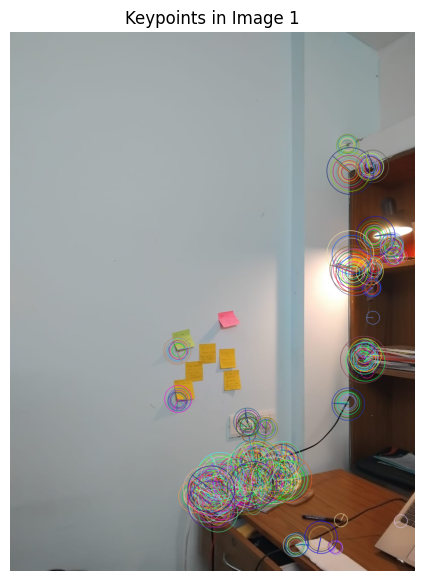

Detected 500 keypoints in image 2


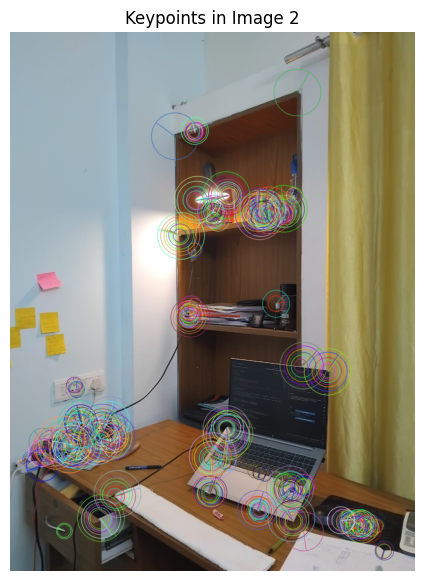

Detected 500 keypoints in image 3


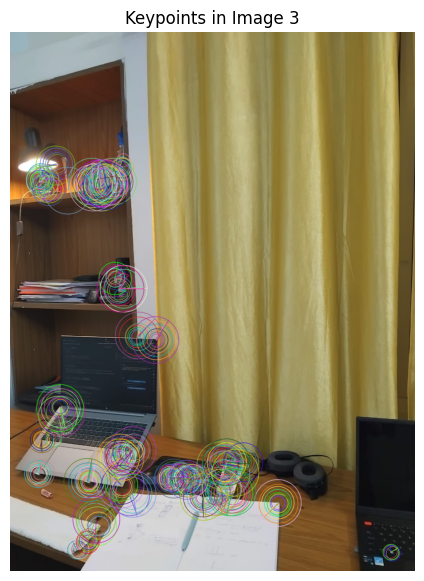

Detected 500 keypoints in image 4


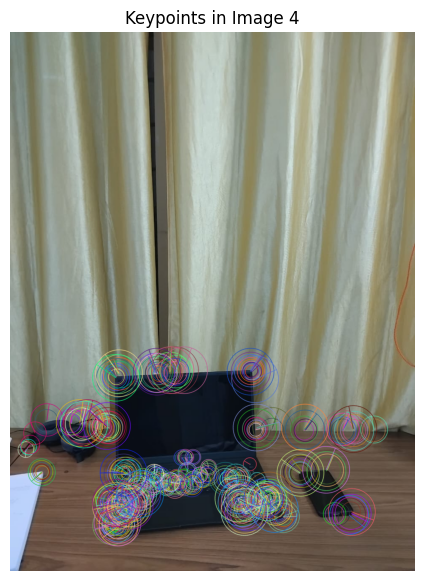

Detected 500 keypoints in image 5


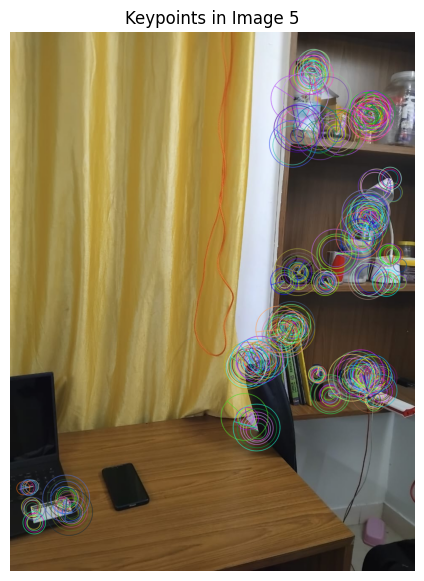

Detected 500 keypoints in image 6


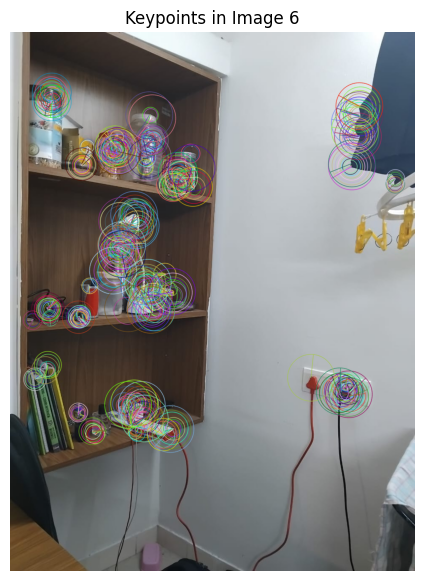

Detected 500 keypoints in image 7


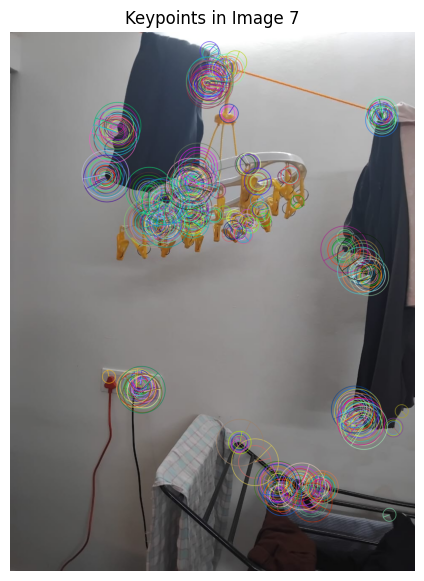

Feature detection completed.


In [39]:

# Example usage:
stitcher = Stitcher(input_dir="data/hostel_room_sequence", output_dir="data/outputs", feature_detector="ORB", matcher_type="BF", plot=True)
stitcher.read_input_dir()
stitcher.detect_keypoints_and_descriptors()


Found 84 good matches after ratio test.
Homography matrix calculated.


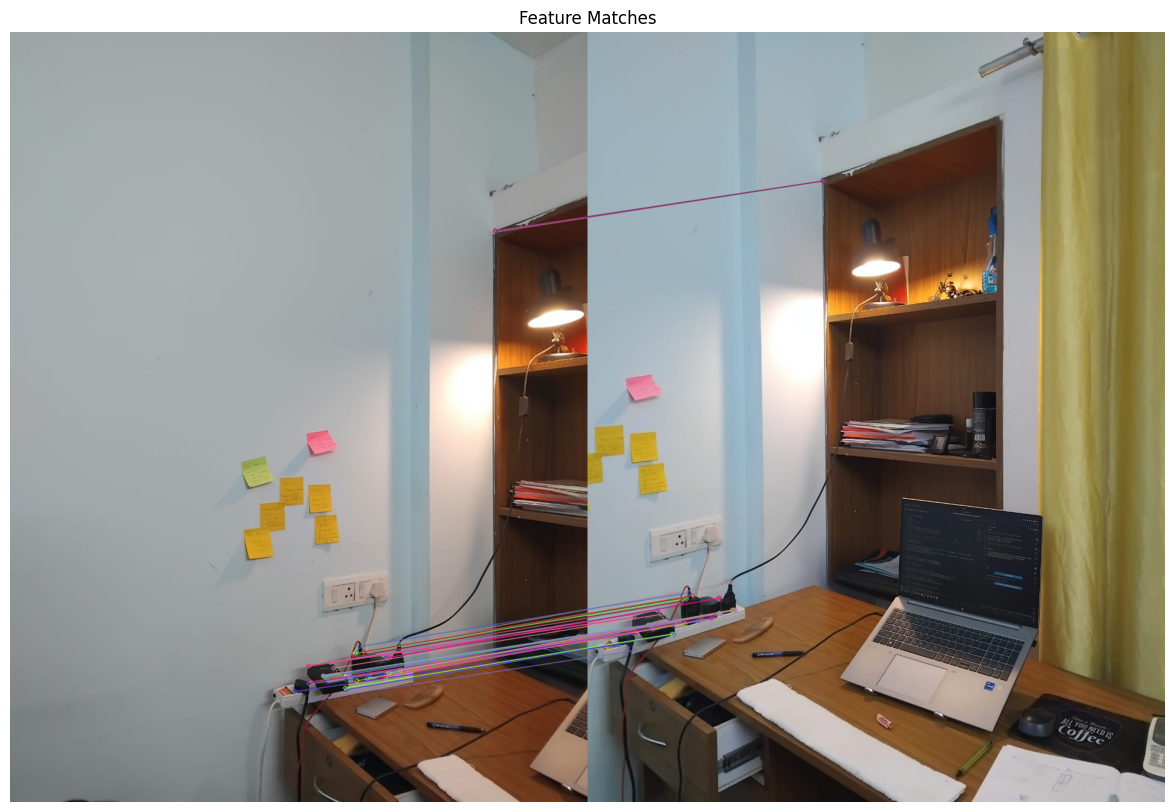

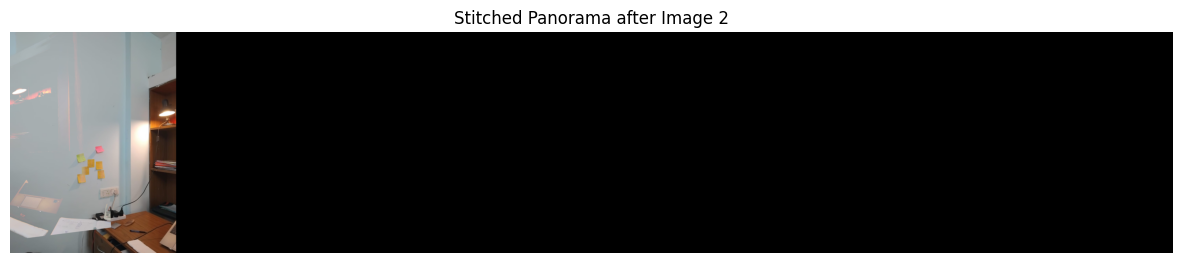

Found 2 good matches after ratio test.


error: OpenCV(4.10.0) /io/opencv/modules/calib3d/src/fundam.cpp:390: error: (-28:Unknown error code -28) The input arrays should have at least 4 corresponding point sets to calculate Homography in function 'findHomography'


In [40]:
stitcher.align_and_stitch_images()